In [45]:
import pandas as pd
df = pd.read_csv("/content/Atlantic_United_Kingdom.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55312 entries, 0 to 55311
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             55312 non-null  object 
 1   position         55312 non-null  int64  
 2   song             55312 non-null  object 
 3   artist           55312 non-null  object 
 4   popularity       55312 non-null  int64  
 5   duration_ms      55312 non-null  int64  
 6   album_type       55312 non-null  object 
 7   total_tracks     55312 non-null  int64  
 8   is_explicit      55312 non-null  bool   
 9   album_cover_url  55312 non-null  object 
 10  duration_min     55312 non-null  float64
 11  artist_list      55312 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 4.7+ MB


In [46]:
df["date"] = pd.to_datetime(df["date"])
df["duration_min"] = df["duration_ms"] / 60000

In [47]:
df = df.drop_duplicates()

In [48]:
df["artist_list"] = df["artist"].str.replace(",", "&")
df["artist_list"] = df["artist_list"].str.split("&")

In [49]:
df = df.explode("artist_list")

In [50]:
df["artist_list"] = df["artist_list"].str.strip()

In [51]:
df.to_csv("/content/cleaned_Atlantic_United_Kingdom.csv", index=False)

In [52]:
unique_artist_daily = df.groupby("date")["artist_list"].nunique()

In [53]:
artist_counts = df["artist_list"].value_counts()

In [54]:
artist_counts.head(20)

,count
artist_list,
Taylor Swift,2092
Chase,1645
Status,1645
RAYE,1144
D-Block Europe,1112
Central Cee,1065
cassö,1044
Sabrina Carpenter,965
Billie Eilish,957


In [55]:
total_entries =len(df)
artist_share = artist_counts / total_entries
aci = (artist_share ** 2).sum()
print("Artist Concentration Index:", aci)

Artist Concentration Index: 0.010362574449731564


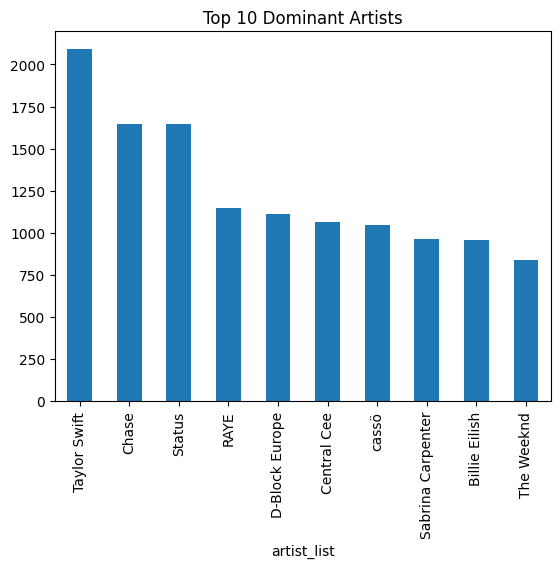

In [56]:
import matplotlib.pyplot as plt
artist_counts.head(10).plot(kind="bar")
plt.title("Top 10 Dominant Artists")
plt.show()

In [57]:
df_original = pd.read_csv("/content/Atlantic_United_Kingdom.csv")
df_original["collab_count"] = df_original["artist"].apply(lambda x: len(x.split(",")))
df_original["type"] = df_original["collab_count"].apply(lambda x:"Solo" if x == 1 else "Collaboration")
df_original["type"].value_counts()

,count
type,
Solo,54388
Collaboration,924


In [58]:
colab_ratio = len(df_original[df_original["type"]=="Collaboration"])/ len(df_original)

In [59]:
import networkx as nx
G = nx.Graph()
for artist in df_original["artist"]:
  artist_list = artist.split("&")

  for i in range(len(artist_list)):
    for j in range (i+1, len(artist_list)):
      G.add_edge(artist_list[i].strip(), artist_list[j].strip())

In [60]:
explicit_ratio = df_original["is_explicit"].mean()

<Axes: xlabel='is_explicit', ylabel='position'>

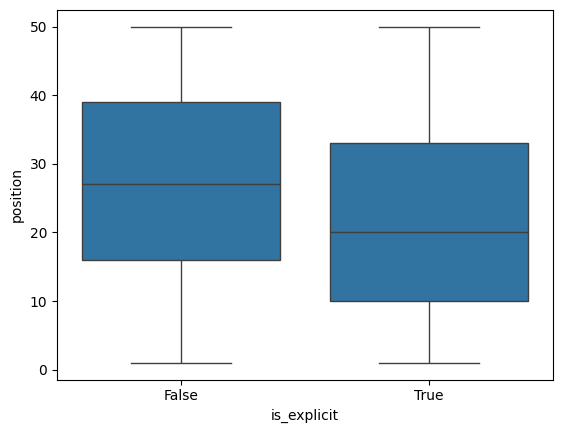

In [61]:
import seaborn as sns
sns.boxplot(x="is_explicit", y="position", data=df_original)

In [62]:
df_original["album_type"].value_counts(normalize=True)

,proportion
album_type,
single,0.641759
album,0.356830
compilation,0.001410


<Axes: xlabel='total_tracks', ylabel='position'>

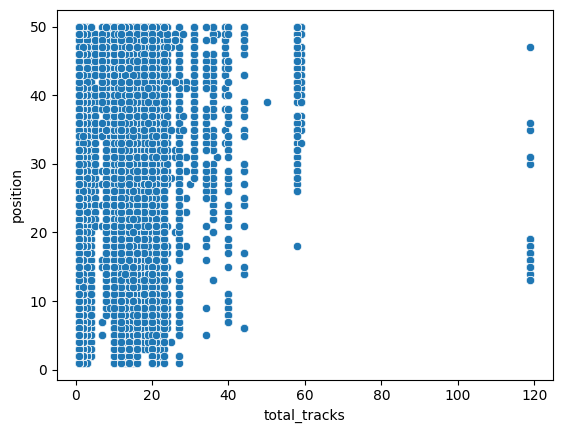

In [63]:
sns.scatterplot(x="total_tracks",y="position",data=df_original)

<Axes: xlabel='duration_ms', ylabel='Count'>

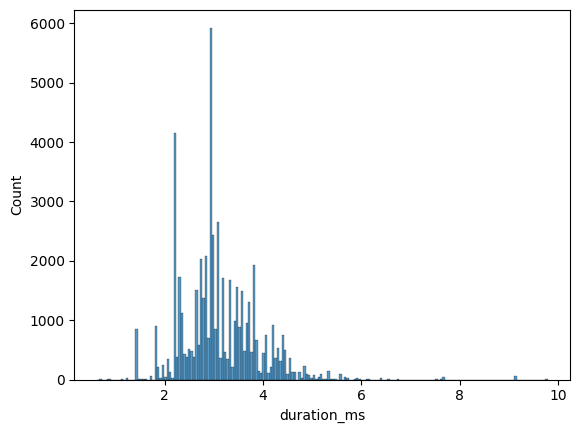

In [64]:
sns.histplot(df_original["duration_ms"]/60000)

<Axes: xlabel='duration_ms', ylabel='popularity'>

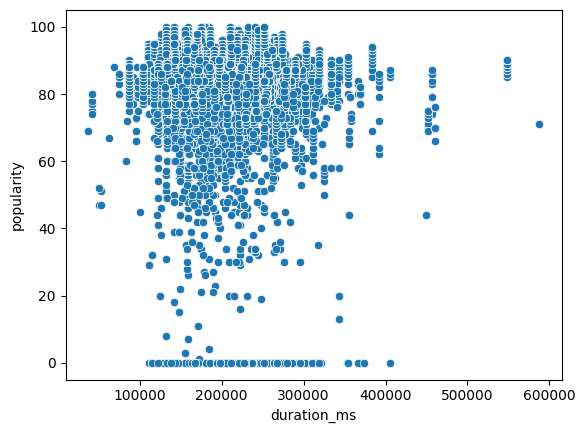

In [65]:
sns.scatterplot(
    x="duration_ms",
    y="popularity",
    data=df_original
)

In [66]:
kpis = {
    "Artist Concentration Index": aci,
    "Unique Artists":df["artist_list"].nunique(),
    "Collaboration Ratio": colab_ratio,
    "Explicit Ratio": explicit_ratio,
    "Single Ratio":
    (df_original["album_type"]=="single").mean()
}


In [67]:
pd.DataFrame([kpis]).to_csv("/content/kpis.csv", index=False)

In [69]:
# =========================
# KPI CALCULATION SECTION
# =========================

import pandas as pd

# Load cleaned dataset
df = pd.read_csv("/content/cleaned_Atlantic_United_Kingdom.csv")

# Load original dataset for collaboration analysis
original = pd.read_csv("/content/Atlantic_United_Kingdom.csv")

# 1. Unique Artist Count
unique_artists = df["artist_list"].nunique()

# 2. Artist Concentration Index
artist_counts = df["artist_list"].value_counts()

total_entries = len(df)

artist_share = artist_counts / total_entries

aci = (artist_share ** 2).sum()

# 3. Collaboration Ratio
original["is_collab"] = original["artist"].str.contains("&|,")

collab_ratio = original["is_collab"].mean()

# 4. Explicit Content Share
explicit_ratio = original["is_explicit"].mean()

# 5. Single vs Album Ratio
single_ratio = (original["album_type"].str.lower() == "single").mean()

# Print KPIs
print("===== UK MARKET KPIs =====")

print("Unique Artists:", unique_artists)

print("Artist Concentration Index:", round(aci,4))

print("Collaboration Ratio:", round(collab_ratio,4))

print("Explicit Content Share:", round(explicit_ratio,4))

print("Single Release Ratio:", round(single_ratio,4))


===== UK MARKET KPIs =====
Unique Artists: 366
Artist Concentration Index: 0.0104
Collaboration Ratio: 0.5935
Explicit Content Share: 0.3692
Single Release Ratio: 0.6418
